In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC  # 线性支持向量机
from sklearn.svm import SVC  # C-Support Vector Classification(可以使用核函数)

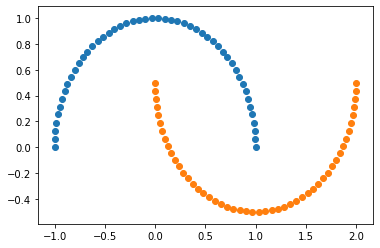

In [134]:
X, y = datasets.make_moons()  # Make two interleaving half circles
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

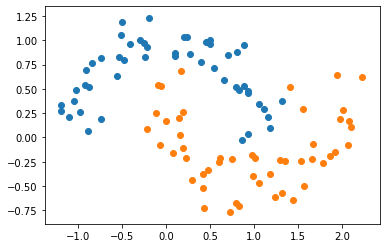

In [135]:
'''
noise : double or None (default=None)
    Standard deviation of Gaussian noise added to the data.
'''
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=666)  # 默认生成样本数量为100

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 使用多项式特征的SVM

In [136]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),  # 添加多项式特征
        ("std_scaler", StandardScaler()),  # 均值方差归一化处理
        ("linearSVC", LinearSVC(C=C))
    ])

In [137]:
poly_svc = PolynomialSVC(degree=3)  # 多项式最高项次数为3
poly_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [138]:
def plot_decision_boundary(model, axis):
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


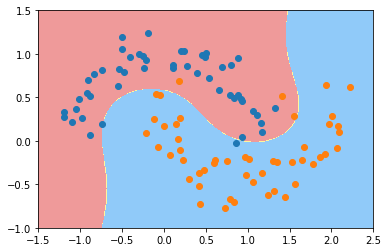

In [139]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [140]:
def PolynomialKernelSVC(degree, C=1.0, coef0=0, gamma='scale'):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, gamma=gamma, C=C, coef0=coef0))
        # 核函数为多项式核(非线性模型时,核函数不要设置为'linear')
    ])

In [141]:
'''
degree : int, optional (default=3)
    Degree of the polynomial kernel function ('poly').
    Ignored by all other kernels.
    
coef0float, optional (default=0.0)
    Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

gamma{‘scale’, ‘auto’} or float, optional (default=’scale’)
    Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

    if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    if ‘auto’, uses 1 / n_features.
'''

poly_kernel_svc = PolynomialKernelSVC(degree=3,  # 多项式核函数的次数(默认degree=3)
                                      coef0=4)  # 常数r(默认为0),由核函数公式知r仅在多项式核函数和Sigmoid核函数中有效
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=4,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


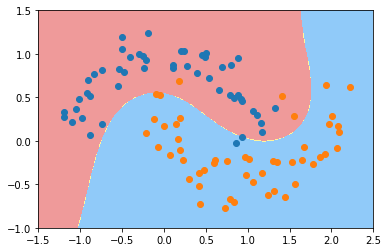

In [142]:
plot_decision_boundary(poly_kernel_svc,
                       axis=[-1.5, 2.5, -1.0, 1.5])  # 与LinearSVC使用多项式特征绘制的决策边界有所不同
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()